# Problems Notebook

<p>Computer Infrastructure </p>   <p>Author: Gerry Callaghan</p>

In [ ]:
# The shebang "#!" distinguish it from a standard comment. The "/usr/bin/env python" avoids hard-coding an absolute path to any specific Python interpreter. I'm not sure if my script is backward-compatible with Python 2, so I'm going to explicitly request python3.
#!/usr/bin/env -S python3 -i

### Problem 1: Data from yfinance

In [1]:
import yfinance
print(yfinance.__version__)

0.2.66


In [2]:
# Dates and times - we will use this package to allow us format dates into strings for filenames.
import datetime as dt

# data frames - we will use pandas to handle tabular data imported from Yahoo Finance.
import pandas as pd

# plot graphs - we will use matplotlib to plot graphs.
import matplotlib.pyplot as plt 

# Yahoo Finance is not part of the cental python repository 
# but is an open-source package available that can be installed via conda-forge.
# This is where we import the yfinance package to allow us to download stock data.
import yfinance as yf


# There are known issues with yfinance and the default user-agent, so i need to spoof my user-agent
# You can read more about this issue here:
# url= "https://www.reddit.com/r/learnpython/comments/1kc3miq/yfinance_error_yfratelimiterrortoo_many_requests/"
# Details on how requests from the curl_cffi package can be imported url ="https://pypi.org/project/curl-cffi/"
import curl_cffi.requests as requests
session = requests.Session(impersonate="chrome")


In [4]:
'''
# Let's write a function called get_data() that will download stock data from Yahoo Finance.
# The function will take our "Fangs" stock ticker symbols as input, and return a pandas DataFrame
# containing the stock data for that ticker.
'''

# From here URL= "https://ranaroussi.github.io/yfinance/", 
# it says that for multiple tickers we need only have whitespace between each ticker symbol.
# That is, it takes a single string with spaces between each ticker symbol.
# So, our function looks like this, remember we are passing in our session object to avoid user-agent issues.
tickers = yf.Tickers('META AAPL AMZN NFLX GOOG', session=session)
print(tickers.tickers)  # This will print the ticker objects for each of our FANG stocks.

{'META': yfinance.Ticker object <META>, 'AAPL': yfinance.Ticker object <AAPL>, 'AMZN': yfinance.Ticker object <AMZN>, 'NFLX': yfinance.Ticker object <NFLX>, 'GOOG': yfinance.Ticker object <GOOG>}


In [16]:
# Let's now confirm that indeed yfinance has understood our ticker symbols
#tickers.tickers['META'].info

In [ ]:
df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h', session=session)


#in the previous command, we had no comma between the stock tickers, 
#but here, because they are in a tuple, we do, and each have apostrophes to indicate they are strings
# the function is download(),and we it takes variables, ticker/tickers and period

# What is the period, 5 days in our case. From URL= "https://algotrading101.com/learn/yfinance-guide/" 5 days is '5d', 
# while we want hourly data, so we set interval='1h' for 1 hour intervals.
#df

# details of this function can be found here https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html
# it says the format of the command is
# yfinance.download(tickers, start=None, end=None, actions=False, threads=True, ignore_tz=None, group_by='column', auto_adjust=None, 
# back_adjust=False, repair=False, keepna=False, progress=True, period=None, interval='1d', prepost=False, proxy=<object object>, 
# rounding=False, timeout=10, session=None, multi_level_index=True) 

# We want to have a copy of the data, copy it to a dataframe called df


/tmp/ipykernel_30734/3341341175.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h', session=session)
[*********************100%***********************]  5 of 5 completed


In [ ]:
df()   
# LEt's now see what is in that dataframe called df

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-10-20 13:30:00+00:00  259.505005  215.330002  256.595001  731.729980   
2025-10-20 14:30:00+00:00  262.570007  214.649994  256.869995  729.929993   
2025-10-20 15:30:00+00:00  263.489990  214.880005  256.859985  731.130005   
2025-10-20 16:30:00+00:00  263.165009  215.710007  256.750000  732.000000   
2025-10-20 17:30:00+00:00  263.730011  215.720001  256.730011  733.150024   
2025-10-20 18:30:00+00:00  263.420013  216.354996  256.970001  733.020020   
2025-10-20 19:30:00+00:00  262.230011  216.470001  257.079987  732.390015   
2025-10-21 13:30:00+00:00  263.499908  221.720001  252.478195  732.794983   
2025-10-21 14:30:00+00:00  263.661987  221.970001  246.860001  730.310120   
2025-10-21 15:30:00+00:00  263.170013  222.975006  249.580002  733.734985   
2025-10-21 16:30:00+00:00  263.326508  221.544998  252.104996  732.683472   
2025-10-21 17:30:00+00:00  263.449890  222.584305  252.750000  732.989990   
2025-10-21 18:30:00+00:00  263.084991  222.460007  252.195007  733.885010   
2025-10-21 19:30:00+00:00  262.839996  222.029999  251.320007  733.249023   
2025-10-22 13:30:00+00:00  260.049896  217.449997  253.899994  732.340027   
2025-10-22 14:30:00+00:00  258.429901  218.739899  253.679993  729.630005   
2025-10-22 15:30:00+00:00  258.549988  218.970001  252.460007  730.020020   
2025-10-22 16:30:00+00:00  256.691406  217.800003  251.589996  727.169983   
2025-10-22 17:30:00+00:00  256.550995  217.304993  251.971100  728.927673   
2025-10-22 18:30:00+00:00  257.510010  218.270004  252.440002  732.510010   
2025-10-22 19:30:00+00:00  258.429993  217.970001  252.520004  733.299988   
2025-10-23 13:30:00+00:00  259.479889  219.885605  254.630005  739.500000   
2025-10-23 14:30:00+00:00  259.399994  220.271393  254.824997  740.539978   
2025-10-23 15:30:00+00:00  260.040009  220.070007  255.350098  738.520020   
2025-10-23 16:30:00+00:00  259.859985  219.774994  254.610001  736.200012   
2025-10-23 17:30:00+00:00  259.970001  220.600006  255.369995  735.229980   
2025-10-23 18:30:00+00:00  259.899994  220.964996  254.419998  734.525024   
2025-10-23 19:30:00+00:00  259.579987  221.089996  253.740005  734.000000   
2025-10-24 13:30:00+00:00  260.941406  223.479996  261.149994  736.294983   
2025-10-24 14:30:00+00:00  263.279999  223.789993  261.234985  733.650024   
2025-10-24 15:30:00+00:00  263.579987  224.765198  261.415009  734.205017   
2025-10-24 16:30:00+00:00  263.609985  224.839996  261.809998  737.342285   
2025-10-24 17:30:00+00:00  264.019989  224.850006  262.000000  738.531006   
2025-10-24 18:30:00+00:00  263.500000  224.335007  261.243805  739.330017   
2025-10-24 19:30:00+00:00  262.739990  224.259995  260.515015  738.510010   

Price                                         High                          \
Ticker                            NFLX        AAPL        AMZN        GOOG   
Datetime                                                                     
2025-10-20 13:30:00+00:00  1224.750000  259.869995  215.369995  256.869995   
2025-10-20 14:30:00+00:00  1233.937012  263.549988  215.660004  257.049988   
2025-10-20 15:30:00+00:00  1235.520020  264.375000  215.190994  257.869995   
2025-10-20 16:30:00+00:00  1240.995728  264.209991  216.050003  257.519989   
2025-10-20 17:30:00+00:00  1245.171021  263.829987  216.149994  257.089996   
2025-10-20 18:30:00+00:00  1239.936035  263.809998  216.608002  257.519989   
2025-10-20 19:30:00+00:00  1238.979980  263.850006  216.649994  257.561707   
2025-10-21 13:30:00+00:00  1238.180054  265.290009  222.239899  255.330002   
2025-10-21 14:30:00+00:00  1239.630005  263.829987  222.369995  253.330002   
2025-10-21 15:30:00+00:00  1241.704956  264.535004  223.149994  250.270004   
2025-10-21 16:30:00+00:00  1240.944946  263.679901  223.320

In [ ]:
# let's confirm the type of dataframe we have
type(df)


pandas.core.frame.DataFrame

In [17]:
# print data as CSV file
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
print(df.to_csv('../data/data.csv'))


None


## Dates and Times

In [18]:
# Current date and time
now = dt.datetime.now()
# docs.python.org/3/library/datetime.html#format-codes 
print(f"{now}")


2025-10-25 19:51:46.246235


In [19]:
# Format date and time
print(now.strftime("%Y-%m-%d %H:%M:%S"))
# docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes
print(now.strftime("%Y%m%d-%H%M%S"))



2025-10-25 19:51:46
20251025-195146


In [20]:
# File name
"../data/" + now.strftime('%Y%m%d-%H%M%S')+'.csv'

'../data/20251025-195146.csv'

In [21]:
# print(df.to_csv("../data/" + now.strftime('%Y%m%d-%H%M%S')+'.csv'))

print(df.to_csv("../data/" + dt.datetime.now().strftime('%Y%m%d-%H%M%S')+'.csv'))

None


In [22]:
df.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

In [23]:
df.index
# this tells us all the values for the x-axis, which is date and time stamps


DatetimeIndex(['2025-10-20 13:30:00+00:00', '2025-10-20 14:30:00+00:00',
               '2025-10-20 15:30:00+00:00', '2025-10-20 16:30:00+00:00',
               '2025-10-20 17:30:00+00:00', '2025-10-20 18:30:00+00:00',
               '2025-10-20 19:30:00+00:00', '2025-10-21 13:30:00+00:00',
               '2025-10-21 14:30:00+00:00', '2025-10-21 15:30:00+00:00',
               '2025-10-21 16:30:00+00:00', '2025-10-21 17:30:00+00:00',
               '2025-10-21 18:30:00+00:00', '2025-10-21 19:30:00+00:00',
               '2025-10-22 13:30:00+00:00', '2025-10-22 14:30:00+00:00',
               '2025-10-22 15:30:00+00:00', '2025-10-22 16:30:00+00:00',
               '2025-10-22 17:30:00+00:00', '2025-10-22 18:30:00+00:00',
               '2025-10-22 19:30:00+00:00', '2025-10-23 13:30:00+00:00',
               '2025-10-23 14:30:00+00:00', '2025-10-23 15:30:00+00:00',
               '2025-10-23 16:30:00+00:00', '2025-10-23 17:30:00+00:00',
               '2025-10-23 18:30:00+00:00', '2025-1

## Problem 2: Plotting Data

<Axes: xlabel='Datetime'>

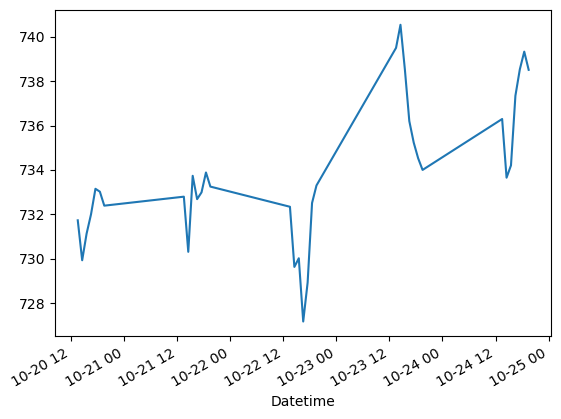

In [24]:
df[('Close','META')].plot()
#so this plot the closing price for MSFT for one month (October 2025)

# end